In [2]:

import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
enhanced_news= pd.read_csv('../enhanced_news.csv')
enhanced_news.shape

(352, 10)

In [10]:
enhanced_news.head()

,Unique ID,URL,Date scraped,Headline,Body,Org,Topics,Sentiment,Scandal_distance,Top_10
0,1,https://www.bbc.com/sport/football/articles/cy...,2025-01-24,Weekend Scottish Premiership team news,Team news for Saturday and Sunday's Scottish P...,"['Team news', 'St Mirren', 'Rennes', 'Nohan Ke...",sport,-0.9443,0.268,False
1,2,https://www.bbc.com/news/articles/c8r5p3drv02o,2025-01-25,South of England weekly news quiz,There has been plenty happening across the sou...,"['BBC Hampshire & Isle of Wight', 'Facebook', ...",sport,0.0772,0.192,False
2,3,https://www.bbc.com/news/articles/c62qgnjxjg1o,2025-01-25,East of England news quiz of the week,The East of England is a busy patch to cover a...,"['BBC', 'Instagram', 'Facebook', 'BBC Beds', '...",entertainment,0.0000,0.284,False
3,4,https://www.bbc.com/news/technology-65786969,2025-01-24,Tech Decoded: The latest news direct to your i...,The tech industry possesses enormous power and...,"['BBC', 'Tech Decoded']",tech,0.9816,0.308,False
4,5,https://www.bbc.com/news/articles/c17en07lw2jo,2025-01-26,Holiday park to install 'adventure nets',A holiday park has been given permission to in...,"['Wiltshire Council', ""Center Parcs'"", 'the Lo...",politics,0.9651,0.316,False


**Proportion of topics per day**

In [11]:

topic_counts = enhanced_news.groupby(['Date scraped', 'Topics']).size().reset_index(name='Count')

total_per_day = enhanced_news.groupby('Date scraped').size().reset_index(name='Total')

merged_df= pd.merge(topic_counts, total_per_day, on='Date scraped')
merged_df['proportion'] = merged_df['Count']/merged_df['Total']


#merged_df.to_csv("proportions_of_topics.csv", index=False )

merged_df

,Date scraped,Topics,Count,Total,proportion
0,2025-01-23,business,15,106,0.141509
1,2025-01-23,entertainment,39,106,0.367925
2,2025-01-23,politics,36,106,0.339623
3,2025-01-23,sport,14,106,0.132075
4,2025-01-23,tech,2,106,0.018868
5,2025-01-24,business,17,97,0.175258
6,2025-01-24,entertainment,25,97,0.257732
7,2025-01-24,politics,33,97,0.340206
8,2025-01-24,sport,20,97,0.206186
9,2025-01-24,tech,2,97,0.020619


**Sentiment per day**

In [12]:
def convert_sentiment(sentiment_score):
    if sentiment_score >= 0.05:
        return 'Positve'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

enhanced_news['Sentiment_str'] = enhanced_news['Sentiment'].apply(convert_sentiment)
sentiment_per_day = enhanced_news.groupby(['Date scraped', 'Sentiment_str' ])['Sentiment_str'].size()
sentiment_per_day_df = sentiment_per_day.reset_index(name='Count')
#sentiment_per_day_df.to_csv("sentiment_per_day.csv", index=False)

sentiment_per_day_df

,Date scraped,Sentiment_str,Count
0,2025-01-23,Negative,44
1,2025-01-23,Neutral,4
2,2025-01-23,Positve,58
3,2025-01-24,Negative,44
4,2025-01-24,Neutral,1
5,2025-01-24,Positve,52
6,2025-01-25,Negative,15
7,2025-01-25,Neutral,4
8,2025-01-25,Positve,40
9,2025-01-26,Negative,22


**Number of companies mentioned**

In [13]:
enhanced_news['Number_of_companies']= enhanced_news['Org'].apply(lambda list_org_str: len(eval(list_org_str)))

dict={}
dict_org={}
for _, row in enhanced_news.iterrows():
    org_list=eval(row['Org']) 
    date= row['Date scraped']
    
    for org in org_list:

        if date in dict_org and org not in dict_org.get(date):
            list=dict_org.get(date)
            list.append(org)
            dict_org[date]= list
    
            if date in dict.keys():
                counter = dict.get(date) + 1
                dict[date]= counter
            else :
                dict[date]= 1

        elif date not in dict_org :
            dict_org[date]= [org]
            dict[date]= 1
        

number_of_company= pd.DataFrame(dict.items(), columns=['Date scraped', 'Number_of_companies_per_day'])
number_of_company['Date scraped'] = pd.to_datetime(number_of_company['Date scraped'])

number_of_company.sort_values(by='Date scraped', inplace=True)

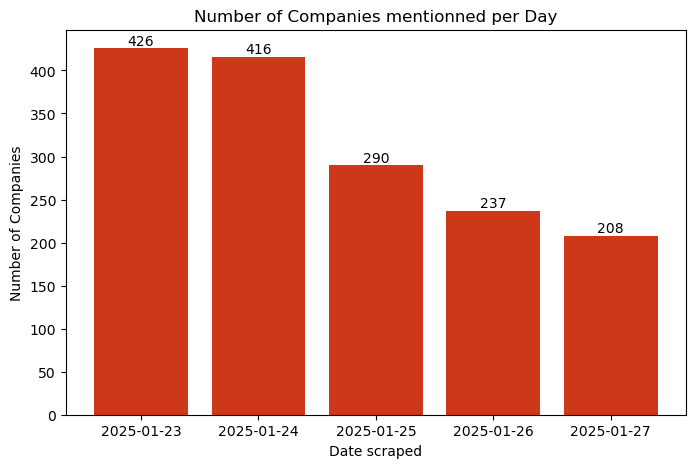

In [14]:
plt.figure(figsize=(8, 5))
bars = plt.bar(number_of_company['Date scraped'], number_of_company['Number_of_companies_per_day'], color='#cd3818')

# Add labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

# Add axis labels and a title
plt.xlabel('Date scraped')
plt.ylabel('Number of Companies')
plt.title('Number of Companies mentionned per Day')

# Save the plot before showing it
plt.savefig('number_of_Companies_mentioned_per_day.png')

# Show the plot
plt.show()